In [ ]:
#import pandas library for creating dataframe
import pandas as pd

In [ ]:
#create dataframe
ebay_df = pd.read_csv("C:/Users/sourav singh/Downloads/eBayiPadTrain.csv")

In [ ]:
#data overview
ebay_df.info()

In [ ]:
#check if dataset consist of any null value
ebay_df.isnull().sum()

# Model 1 is created by removing description , sold, uniqueId field

In [ ]:
model_wo_desc_x = ebay_df.drop(['description','UniqueID'],axis = 1)
model_wo_desc_x

### plot a graph to see how target data is distributed 

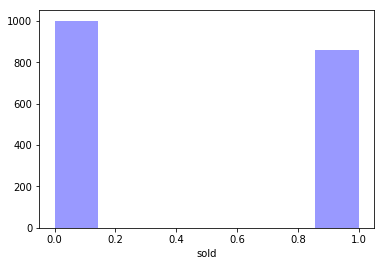

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(model_wo_desc_x['sold'], kde=False,hist = True, color='blue')

In [94]:
model_wo_desc_x['sold'].value_counts()

0    1001
1     860
Name: sold, dtype: int64

#### converting every column of dataframe into one-hot encoding and at the same time renaming column "Unkown" with meaning full column name 

In [95]:
encod_condition = pd.get_dummies(model_wo_desc_x.condition)
encod_carrier = pd.get_dummies(model_wo_desc_x.carrier)
model_wo_desc_x = pd.concat([model_wo_desc_x, encod_condition, encod_carrier], axis=1)
model_wo_desc_x.rename(columns={'Unknown':'Unknown_carrier'},inplace=True)

In [96]:
encod_color = pd.get_dummies(model_wo_desc_x.color)
model_wo_desc_x = pd.concat([model_wo_desc_x, encod_color], axis=1)
model_wo_desc_x.rename(columns={'Unknown':'Unknown_color'},inplace=True)

In [97]:
encod_storage = pd.get_dummies(model_wo_desc_x.storage)
model_wo_desc_x = pd.concat([model_wo_desc_x, encod_storage], axis=1)
model_wo_desc_x.rename(columns={'Unknown':'Unknown_storage'},inplace=True)

In [98]:
encod_productline = pd.get_dummies(model_wo_desc_x.productline)
model_wo_desc_x = pd.concat([model_wo_desc_x, encod_productline], axis=1)
model_wo_desc_x.rename(columns={'Unknown':'Unknown_productline'},inplace=True)

In [99]:
encod_cellular = pd.get_dummies(model_wo_desc_x.cellular)
encod_cellular.rename(columns={'0':'Celluar_notEnabled','1':'Cellular_enabled','Unknown':'Unknown_cellular'},inplace=True)
model_wo_desc_x = pd.concat([model_wo_desc_x, encod_cellular], axis=1)
model_wo_desc_x.rename(columns={'Unknown':'Unknown_cellular'},inplace=True)

### removing coulmns : condition,cellular,carrier,color, storage , productline

In [12]:
model_wo_desc_x.isnull().sum()

biddable                    0
startprice                  0
condition                   0
cellular                    0
carrier                     0
color                       0
storage                     0
productline                 0
sold                        0
For parts or not working    0
Manufacturer refurbished    0
New                         0
New other (see details)     0
Seller refurbished          0
Used                        0
AT&T                        0
None                        0
Other                       0
Sprint                      0
T-Mobile                    0
Unknown_carrier             0
Verizon                     0
Black                       0
Gold                        0
Space Gray                  0
Unknown_color               0
White                       0
128                         0
16                          0
32                          0
64                          0
Unknown_storage             0
Unknown_productline         0
iPad 1    

In [13]:
model_wo_desc_x_OHE = model_wo_desc_x.drop(['condition','cellular','carrier','color','storage','productline'],axis=1)
model_wo_desc_x_OHE

,biddable,startprice,sold,For parts or not working,Manufacturer refurbished,New,New other (see details),Seller refurbished,Used,AT&T,...,iPad 5,iPad Air,iPad Air 2,iPad mini,iPad mini 2,iPad mini 3,iPad mini Retina,Celluar_notEnabled,Cellular_enabled,Unknown_cellular
0,0,159.99,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,199.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,235.00,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,199.99,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,175.00,1,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
6,1,100.00,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
7,0,329.99,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8,1,0.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9,1,150.00,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Split the dataset into Training and Test datasect

In [14]:
Y = model_wo_desc_x_OHE["sold"]
X = model_wo_desc_x_OHE.drop("sold", axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=50)

### Logistic Regresssion

In [15]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\sourav singh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
logreg.score(X_test, y_test)

0.7942754919499105

### Decsion Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier()
decTree.fit(X_train, y_train)
decTree.score(X_test, y_test)

0.7584973166368515

### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

C:\Users\sourav singh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7978533094812165

### Score of training set (Random forest,Decesion Tree, Logistic Regression)

In [19]:
rf.score(X_train, y_train)

0.967741935483871

In [20]:
decTree.score(X_train, y_train)

0.9907834101382489

In [21]:
logreg.score(X_train, y_train)

0.8003072196620584

In [22]:
model_wo_desc_x_OHE.head()

,biddable,startprice,sold,For parts or not working,Manufacturer refurbished,New,New other (see details),Seller refurbished,Used,AT&T,...,iPad 5,iPad Air,iPad Air 2,iPad mini,iPad mini 2,iPad mini 3,iPad mini Retina,Celluar_notEnabled,Cellular_enabled,Unknown_cellular
0,0,159.99,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,199.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,235.00,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,199.99,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
ebay_df.head()

,description,biddable,startprice,condition,cellular,carrier,color,storage,productline,sold,UniqueID
0,iPad is in 8.5+ out of 10 cosmetic condition!,0,159.99,Used,0,None,Black,16,iPad 2,0,10001
1,"Previously used, please read description. May ...",1,0.99,Used,1,Verizon,Unknown,16,iPad 2,1,10002
2,NaN,0,199.99,Used,0,None,White,16,iPad 4,1,10003
3,NaN,0,235.00,New other (see details),0,None,Unknown,16,iPad mini 2,0,10004
4,Please feel free to buy. All products have bee...,0,199.99,Seller refurbished,Unknown,Unknown,Unknown,Unknown,Unknown,0,10005


In [24]:
model_wo_desc_x_OHE.head()

,biddable,startprice,sold,For parts or not working,Manufacturer refurbished,New,New other (see details),Seller refurbished,Used,AT&T,...,iPad 5,iPad Air,iPad Air 2,iPad mini,iPad mini 2,iPad mini 3,iPad mini Retina,Celluar_notEnabled,Cellular_enabled,Unknown_cellular
0,0,159.99,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,199.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,235.00,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,199.99,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# Model 2 is created by including description

In [25]:
ebay_df.head()

,description,biddable,startprice,condition,cellular,carrier,color,storage,productline,sold,UniqueID
0,iPad is in 8.5+ out of 10 cosmetic condition!,0,159.99,Used,0,None,Black,16,iPad 2,0,10001
1,"Previously used, please read description. May ...",1,0.99,Used,1,Verizon,Unknown,16,iPad 2,1,10002
2,NaN,0,199.99,Used,0,None,White,16,iPad 4,1,10003
3,NaN,0,235.00,New other (see details),0,None,Unknown,16,iPad mini 2,0,10004
4,Please feel free to buy. All products have bee...,0,199.99,Seller refurbished,Unknown,Unknown,Unknown,Unknown,Unknown,0,10005


In [26]:
model_wo_desc_x_OHE['Desc'] = ebay_df['description'] 
model_wo_desc_x_OHE.head()

,biddable,startprice,sold,For parts or not working,Manufacturer refurbished,New,New other (see details),Seller refurbished,Used,AT&T,...,iPad Air,iPad Air 2,iPad mini,iPad mini 2,iPad mini 3,iPad mini Retina,Celluar_notEnabled,Cellular_enabled,Unknown_cellular,Desc
0,0,159.99,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,iPad is in 8.5+ out of 10 cosmetic condition!
1,1,0.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,"Previously used, please read description. May ..."
2,0,199.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,NaN
3,0,235.00,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,NaN
4,0,199.99,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Please feel free to buy. All products have bee...


In [27]:
model_wo_desc_x_OHE.count()

biddable                    1861
startprice                  1861
sold                        1861
For parts or not working    1861
Manufacturer refurbished    1861
New                         1861
New other (see details)     1861
Seller refurbished          1861
Used                        1861
AT&T                        1861
None                        1861
Other                       1861
Sprint                      1861
T-Mobile                    1861
Unknown_carrier             1861
Verizon                     1861
Black                       1861
Gold                        1861
Space Gray                  1861
Unknown_color               1861
White                       1861
128                         1861
16                          1861
32                          1861
64                          1861
Unknown_storage             1861
Unknown_productline         1861
iPad 1                      1861
iPad 2                      1861
iPad 3                      1861
iPad 4    

### No of rows with NAN vs No of rows with values

In [28]:
nan_val = model_wo_desc_x_OHE['Desc'].isna().sum().sum()
not_nan_val = model_wo_desc_x_OHE['Desc'].count()
print(nan_val)
print(not_nan_val)

1071
790


### fill all NAN in DESC column with nill

In [29]:
model_wo_desc_x_OHE['Desc'].fillna('Nil',inplace=True)


In [30]:
model_wo_desc_x_OHE.head()

,biddable,startprice,sold,For parts or not working,Manufacturer refurbished,New,New other (see details),Seller refurbished,Used,AT&T,...,iPad Air,iPad Air 2,iPad mini,iPad mini 2,iPad mini 3,iPad mini Retina,Celluar_notEnabled,Cellular_enabled,Unknown_cellular,Desc
0,0,159.99,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,iPad is in 8.5+ out of 10 cosmetic condition!
1,1,0.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,"Previously used, please read description. May ..."
2,0,199.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,Nil
3,0,235.00,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,Nil
4,0,199.99,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Please feel free to buy. All products have bee...


In [103]:
print(model_wo_desc_x_OHE['Desc'].isna().sum().sum())
print(model_wo_desc_x_OHE['Desc'].count())

0
1861


In [110]:
# library to clean data 
import re  
  
# Natural Language Tool Kit 
import nltk  
  
#nltk.download('stopwords') 
  
# to remove stopword 
from nltk.corpus import stopwords 
  
# for Stemming propose  
from nltk.stem.porter import PorterStemmer 
  
# Initialize empty array to append clean text 
corpus = []  
  
# 1000 (reviews) rows to clean 
for i in range(0, 1861):  
      
    # column : "Review", row ith 
    review = re.sub('[^a-zA-Z]', ' ', model_wo_desc_x_OHE['Desc'][i])  
      
    # convert all cases to lower cases 
    review = review.lower()  
      
    # split to array(default delimiter is " ") 
    review = review.split()  
      
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer()  
      
    # loop for stemming each word 
    # in string array at ith row     
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
                  
    # rejoin all string array elements 
    # to create back into a string 
    review = ' '.join(review)   
      
    # append each string to create 
    # array of clean text  
    corpus.append(review)

In [152]:
review

'day warranti fulli function engrav ipad st gener sign normal wear'

In [108]:
model_wo_desc_x_OHE['new_Phrase']=corpus
model_wo_desc_x_OHE.head(15)

,biddable,startprice,sold,For parts or not working,Manufacturer refurbished,New,New other (see details),Seller refurbished,Used,AT&T,...,iPad Air 2,iPad mini,iPad mini 2,iPad mini 3,iPad mini Retina,Celluar_notEnabled,Cellular_enabled,Unknown_cellular,Desc,new_Phrase
0,0,159.99,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,iPad is in 8.5+ out of 10 cosmetic condition!,ipad cosmet condit
1,1,0.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,"Previously used, please read description. May ...",previous use pleas read descript may show sign...
2,0,199.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,Nil,nil
3,0,235.00,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,Nil,nil
4,0,199.99,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,Please feel free to buy. All products have bee...,pleas feel free buy product thoroughli inspect...
5,1,175.00,1,0,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,Nil,nil
6,1,100.00,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,Nil,nil
7,0,329.99,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,Nil,nil
8,1,0.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,Nil,nil
9,1,150.00,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,Nil,nil


### remove the desc column

In [111]:
model_wo_desc_x_OHE.drop(['Desc'],axis=1,inplace=True)

In [153]:
model_wo_desc_x_OHE_sold = model_wo_desc_x_OHE["sold"]
model_wo_desc_x_OHE_Nsold = model_wo_desc_x_OHE.drop("sold", axis=1)

In [155]:
model_wo_desc_x_OHE_Nsold

,biddable,startprice,For parts or not working,Manufacturer refurbished,New,New other (see details),Seller refurbished,Used,AT&T,None,...,iPad Air,iPad Air 2,iPad mini,iPad mini 2,iPad mini 3,iPad mini Retina,Celluar_notEnabled,Cellular_enabled,Unknown_cellular,new_Phrase
0,0,159.99,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,ipad cosmet condit
1,1,0.99,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,previous use pleas read descript may show sign...
2,0,199.99,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,nil
3,0,235.00,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,nil
4,0,199.99,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,pleas feel free buy product thoroughli inspect...
5,1,175.00,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,nil
6,1,100.00,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,nil
7,0,329.99,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,nil
8,1,0.99,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,nil
9,1,150.00,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,nil


In [156]:
# Creating the Bag of Words 
# model now here some steps to count every word 
from sklearn.feature_extraction.text import CountVectorizer 
bag=model_wo_desc_x_OHE_Nsold['new_Phrase']
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000)
bag_words = vectorizer.fit_transform(bag)
bag_words = bag_words.toarray()
bag= vectorizer.get_feature_names()
bag

['abl',
 'absolut',
 'abus',
 'ac',
 'accept',
 'accessori',
 'account',
 'across',
 'activ',
 'actual',
 'actuuli',
 'adapt',
 'adaptor',
 'add',
 'addit',
 'adult',
 'advis',
 'affect',
 'ago',
 'air',
 'almost',
 'along',
 'alreadi',
 'also',
 'alway',
 'amount',
 'amp',
 'anoth',
 'answer',
 'antenna',
 'anyon',
 'appear',
 'appl',
 'appli',
 'approv',
 'april',
 'area',
 'around',
 'assembl',
 'associ',
 'attach',
 'auction',
 'averag',
 'awesom',
 'back',
 'backlight',
 'backlit',
 'backplat',
 'backsid',
 'bad',
 'bare',
 'barley',
 'batteri',
 'beauti',
 'beetl',
 'begin',
 'bend',
 'bent',
 'best',
 'bezel',
 'bidder',
 'binder',
 'black',
 'blemish',
 'block',
 'blue',
 'bluetooth',
 'board',
 'bodi',
 'book',
 'boot',
 'bottom',
 'bought',
 'bound',
 'box',
 'br',
 'brand',
 'brick',
 'bright',
 'broke',
 'broken',
 'bruis',
 'bump',
 'button',
 'buy',
 'buyer',
 'cabl',
 'came',
 'camera',
 'cannot',
 'capabl',
 'card',
 'care',
 'carrier',
 'case',
 'caus',
 'cellular',
 '

In [157]:
bag_words

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [168]:
print (bag_words.shape)

(1861, 694)


In [169]:
import numpy as np
dist = np.sum(bag_words, axis=0)
for tag, count in zip(bag, dist):
    print (tag,count)

abl 2
absolut 9
abus 1
ac 5
accept 2
accessori 20
account 1
across 1
activ 4
actual 1
actuuli 1
adapt 9
adaptor 1
add 1
addit 3
adult 2
advis 1
affect 18
ago 4
air 17
almost 9
along 3
alreadi 4
also 2
alway 15
amount 1
amp 45
anoth 3
answer 2
antenna 1
anyon 1
appear 2
appl 47
appli 2
approv 2
april 1
area 1
around 2
assembl 1
associ 3
attach 1
auction 4
averag 7
awesom 1
back 54
backlight 1
backlit 1
backplat 1
backsid 1
bad 4
bare 12
barley 1
batteri 4
beauti 2
beetl 1
begin 1
bend 1
bent 1
best 3
bezel 3
bidder 1
binder 1
black 11
blemish 24
block 1
blue 3
bluetooth 2
board 1
bodi 8
book 1
boot 1
bottom 5
bought 5
bound 1
box 77
br 5
brand 23
brick 1
bright 1
broke 1
broken 17
bruis 1
bump 1
button 12
buy 7
buyer 1
cabl 14
came 3
camera 7
cannot 2
capabl 1
card 2
care 8
carrier 3
case 72
caus 1
cellular 4
certifi 7
chang 2
charg 14
charger 28
check 1
cherish 1
chip 4
chrome 1
class 1
clean 34
cleanli 1
clear 12
close 1
cloud 1
color 4
com 1
come 43
compani 1
complet 4
compon 3
condi

In [170]:
postive_new= pd.DataFrame(dist)

postive_new.columns=['word_count']

postive_new['word'] = pd.Series(bag, index=postive_new.index)

postive_new1=postive_new[['word','word_count']]

postive_new1.head()

,word,word_count
0,abl,2
1,absolut,9
2,abus,1
3,ac,5
4,accept,2


In [171]:
top_30_words=postive_new1.sort_values(['word_count'],ascending=[0])
top_30_words

,word,word_count
403,nil,1071
117,condit,353
655,use,250
529,scratch,219
307,ipad,181
531,screen,155
683,work,147
254,good,144
399,new,112
380,minor,95


In [172]:
corpus

['ipad cosmet condit',
 'previous use pleas read descript may show sign use scratch screen',
 'nil',
 'nil',
 'pleas feel free buy product thoroughli inspect clean test',
 'nil',
 'nil',
 'nil',
 'nil',
 'nil',
 'good condit minor wear tear bodi light scratch screen function great',
 'nil',
 'good condit clean icloud lock clean imei tablet fulli test work',
 'nil',
 'new digit instal scratch back small dent top right bottom left corner',
 'nil',
 'great work ipad minor surfac scratch back pictur light scratch',
 'sell good qualiti ipad fulli test appl certifi technician',
 'nil',
 'nil',
 'crack screen',
 'great work ipad light scratch consist typic wear pictur',
 'fulli function clean esn',
 'nil',
 'nil',
 'ipad mini open box item good condit includ origin box includ genuin',
 'fulli function',
 'ipad use good cosmet condit minor scratch bodi normal',
 'custom carrier return cosmet condit origin box',
 'come usb cabl wall adapt may minor ding scuff',
 'ipad previous use show light si

In [173]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X_train_desc = cv.fit_transform(model_wo_desc_x_OHE_Nsold).toarray()
# y_train_desc = model_wo_desc_x_OHE_sold.iloc[:, 2].values
# X_train_desc

In [165]:
Y_desc = model_wo_desc_x_OHE_sold
X_desc = model_wo_desc_x_OHE_Nsold
# X_desc

In [166]:
from sklearn.model_selection import train_test_split
X_train_desc, X_test_desc, y_train_desc, y_test_desc = train_test_split(X_train_desc, y_train_desc, test_size = 0.20) 

ValueError: Found input variables with inconsistent numbers of samples: [41, 1861]

In [143]:
from sklearn.ensemble import RandomForestClassifier 
 
model_rfc = RandomForestClassifier(n_estimators = 501,criterion = 'entropy')
model_rfc.fit(X_train_desc, y_train_desc)

ValueError: could not convert string to float: 'nil'

In [144]:
model_rfc.score(X_train_desc, y_train_desc)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.